#This notebook is used for craeting the EgoPlaces dataset from the EgoRoutine dataset as well as Sampling the Places365 dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

#Libraries

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.layers import Dense,AveragePooling2D,Dropout,Flatten,Dense,Input,Concatenate
from google.colab.patches import cv2_imshow,cv2
import os
import pandas as pd
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import files
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.utils import shuffle
import json
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
  user_1 = '/content/gdrive/MyDrive/images_routine_users/'
  user_list = []
  dirListing = os.listdir(user_1)
  for files in dirListing:
    if files.startswith("user_"):
      relpath = os.path.relpath(files)
      users = os.path.join(user_1,files)
      # print("A",files)
      #print("B",users)
      # print("C",relpath)
     # print("With paths")
    #  print("D",os.listdir(users))
      for u in os.listdir(users):
        print(u)
        user_folder = os.path.join(users,u)
        if(not user_folder.endswith('Store')):
          user_list.append(user_folder)
        #print(dirListing2)
      #users.append(files)
      #print(os.path.join(users,files))
      #print(userList)
  #print(dirListing)


In [ ]:
#Reading images from each user folder

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        # filename.sort(key = os.path.getctime(os.path.join(folder,filename)))
        if filename.endswith(".jpg"):
            images.append(os.path.join(folder,filename))
            #Sorting images by creation date
            #images.sort(key=os.path.getctime(images))
            #print(os.list.dir(filename)
    return images

 #img = cv2.imread(os.path.join(folder, filename))
  #          if img is not None:

In [ ]:
def read_labels_from_folder(folder):
  labels = []
  for filename in os.listdir(folder):
    if filename.endswith('.csv'):
      labels = pd.read_csv(filename)
  return labels

In [ ]:
#Getting the different subfolders needed
#user_1 = '/content/gdrive/MyDrive/images_routine_users/user_01'
#user_list = []

user_images_all = []

user_list.sort()
for folder in user_list:
  us = []
  user_images = load_images_from_folder(folder)
  user_images.sort(key = os.path.getctime)
  
  user_images_all.extend(user_images)
user_image_data = pd.DataFrame(user_images_all)  


In [ ]:
#Responsible for building labels
labels_path = '/content/gdrive/MyDrive/images_routine_users/Descriptors - EgoRoutine/places'
#Read csv for labels\
label_path = []
labels = []
labels_all = []
label_data = []
for label_file in user_list:
  #print(label_file)
  
  q = label_file.split('/')[-1]
  p = label_file.split('/')[-2]
  #print(p,q)
  p = p.replace('_','')
  r = p+'/'+q
  s = os.path.join(labels_path,r)
  s = s+'_labels_places.csv'
  label_path.append(s)
  
  #print(s)
for label in sorted(label_path):
  #print("Reading ",label,":")
  labels = pd.read_csv(label,header=None)
  print("Adding to database")
  label_data.append(labels)
  #print(labels)
  print("Going to next one")
labels_all = pd.concat(label_data)
labels_data = pd.DataFrame(labels_all)

#Building the final data frame
user_image_data.reset_index(drop=True, inplace=True)
labels_data.reset_index(drop=True, inplace=True)
final_data = pd.concat([user_image_data, labels_data], axis=1)
  
  

In [ ]:
#Not needed for now
#Adding labels
user_label_list = []
labels_root_path = '/content/gdrive/MyDrive/images_routine_users/Descriptors - EgoRoutine/places'
for label_folders in os.listdir(labels_root_path):
  #user_label = os.path.join(labels_root_path,label_folders)
  user_label_list.append(label_folders)
  for user_label in os.listdir(os.path.join(labels_root_path,label_folders)):
    x = user_label.split('_')[0]
    y = user_label.split('_')[1]
    z = x+'_'+y
    print(z)
    # y = '_'.join(x)
    # print(y)
  #print(user_label)


In [ ]:
#Checking for duplicates

def checkIfDuplicates_3(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return True
    return False

In [ ]:
#Running function to check duplicates
checkIfDuplicates_3(user_image_data)


#Data splitter

Here lies the function which will transform the meta dataset into data frames made up of the classes in the format df_classname

In [ ]:
#Performing the split using sklearn
#Creating a function to do this for us
def split_data(df,r_train,r_test,r_val):
  train_ratio = r_train
  test_ratio = r_test
  val_ratio = r_val
  #Creating the test set
  df_remaining,df_test = train_test_split(df,test_size = test_ratio,shuffle='True',random_state=42)
  ratio_remain = 1-test_ratio
  adjusted_ratio = val_ratio/ratio_remain
  df_train,df_val = train_test_split(df,test_size = adjusted_ratio,shuffle='True',random_state=42)
  return df_train,df_test,df_val

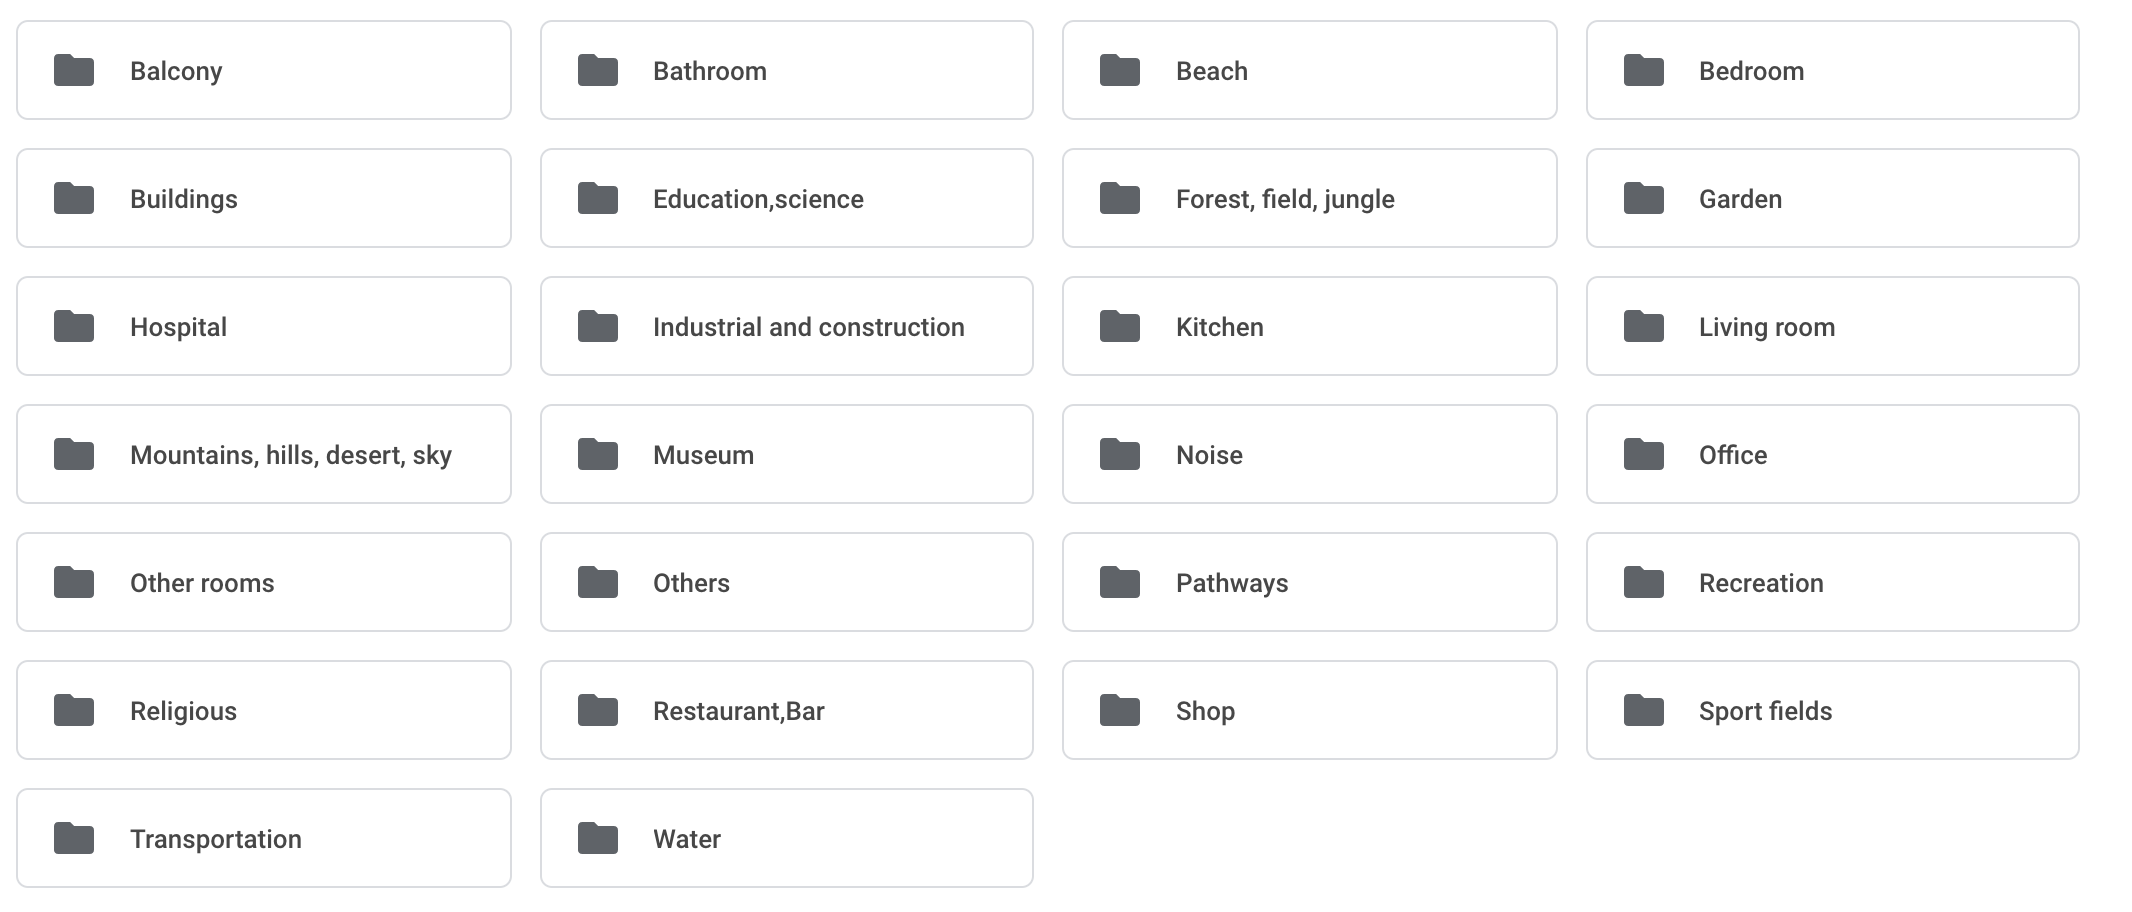

#Label Creation

In [ ]:
#Make this into a function when time permits

#Reading labels from the excel files
metalabel_data = []
metalabels_all = []
metalabels_path = "/content/gdrive/MyDrive/image_routine_descriptors"
for file in sorted(os.listdir(metalabels_path)):
  print(file)
  if(file.endswith('.xlsx')):
    meta_labels = pd.concat(pd.read_excel(os.path.join(metalabels_path,file),sheet_name=None))
    metalabel_data.append(meta_labels)
metalabels_all = pd.concat(metalabel_data)
meta_label_all_data = pd.DataFrame(metalabels_all)
meta_label_all_data.to_csv('meta_label.csv')  

#Creating data frames per class name

In [ ]:
#Creating dataframes for each class
#meta_label_all_data.to_csv('meta_label.csv')
meta_label_all_data.head()
test_labels_all = pd.read_csv('meta_label.csv')
test_labels_all = pd.DataFrame(test_labels_all)
#test_labels_all.head()
user = test_labels_all.iloc[:,0].str[0:4]+'_0'+test_labels_all.iloc[:,0].str[4:5]
test_labels_all.iloc[:,2] = '/'+test_labels_all.iloc[:,0].str[0:4]+'_0'+test_labels_all.iloc[:,0].str[4:5]+'/'+test_labels_all.iloc[:,0]+'/'+test_labels_all.iloc[:,2]
test_labels_all = test_labels_all.iloc[:,1:]
test_labels_all.columns = ['ID','Photo','Class']
class_names_meta = test_labels_all['Class'].unique()
sorted(class_names_meta)
for class_name in class_names_meta:
  class_name_rep = class_name.replace(" ","_")
  class_name_rep = class_name_rep.replace("/","_")
  class_name_rep = class_name_rep.replace(" ","")
  class_name_rep = class_name_rep.replace(",_","_")

  #print(class_name_rep)
  h = "df_" + str(class_name_rep)
  vars()[h] = test_labels_all[test_labels_all['Class'] == class_name]
  print("Created: ",h)




#Data splitter in action


In [ ]:
#Create loop to do this for all the dataframes
df_Education_science_train,df_Education_science_test,df_Education_science_val = split_data(df_Education_science,0.6,0.2,0.2)


In [ ]:
# # Use the torchvision's implementation of ResNeXt, but add FC layer for a different number of classes (27) and a Sigmoid instead of a default Softmax.
# class Resnext50(nn.Module):
#     def __init__(self, n_classes):
#         super().__init__()
#         resnet = models.resnext50_32x4d(pretrained=True)
#         resnet.fc = nn.Sequential(
#             nn.Dropout(p=0.2),
#             nn.Linear(in_features=resnet.fc.in_features, out_features=n_classes)
#         )
#         self.base_model = resnet
#         self.sigm = nn.Sigmoid()

#     def forward(self, x):
#         return self.sigm(self.base_model(x))

# # Initialize the model
# model = Resnext50(len(label_classes))
# # Switch model to the training mode
# model.train()
# df_Sport_fields_train,df_Sport_fields_test,df_Sport_fields_val = split_data(df_Sport_fields,0.6,.2,.2)
# abc = get_data(df_Sport_fields_val)
abc

# Model Definition comes here
## This is the base line model

In [ ]:
#Defining the model
base_model = ResNet50(weights='places', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = AveragePooling2D(pool_size=(7,7))(x)
x = Flatten(name ="flatten")(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.5)(x)
preds = Dense(24,activation="softmax")(x)

#Activating the model

model = Model(inputs = base_model.input,outputs = preds)

#predictions = Dense(26,activation='softmax')(x)
#Using softmax for base classification
#model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False




#Declaring the optimizer

In [ ]:
#Checking the model statistics
#model.summary()
#Setting seed ...
np.random.seed(7)
lr = 1e-2
num_epochs = 20
opti = Adam(learning_rate= lr,decay = lr/num_epochs)
model.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],loss='categorical_crossentropy')

In [ ]:
from PIL import Image
import io


#im = PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f79a0ad8e30>
# image = Image.frombytes('RGBA', (224,224), 0x7f79a0ad8e30, 'raw')

###Loading functions to get the paths of the images

In [ ]:
def get_image_data(df,root_path):
  image_paths = []
  labels = []
  image_paths = df['Photo']
  labels = df['Class']
  image_paths = ro+image_paths
  return image_paths,labels

In [ ]:
#/content/gdrive/MyDrive/images_routine_users/user_01/user1_01/20171201_115957_000.jpg'
def img_to_data(path):
  im = []
  image_path = path
  image = cv2.imread(image_path);
  image_reshape = cv2.resize(image,(224,224))
  #image_batch = np.expand_dims(image_reshape, axis = 0)
  im.append(image_reshape)
  return im


##Get image as array and return along with labels

In [ ]:


def get_data(df):
  ro = '/content/gdrive/MyDrive/images_routine_users'
  test_paths,label = get_image_data(df,ro)
  c = pd.DataFrame(test_paths)
  d = []
  for testpath in test_paths:
    print('For image:',testpath)
    image = img_to_data(testpath)
    print('Path created for:',testpath)
    d.extend(image)
  return d,label



In [ ]:
b

In [ ]:
#a,a_lab = get_data(df_Office_val)
#a = get_data(df_Office_val)
a = pd.DataFrame(df_Sport_fields_val)
b,b_lab = get_data(a)

In [ ]:
trainAug = ImageDataGenerator(
	rotation_range=25,
	zoom_range=0.1,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

#Grouping the folders into directories and subdirectories

In [ ]:
# df_Education_science['Class'] = df_Education_science['Class'].str.replace('/',',')
# df_Education_science.head()
len(df_Office_val)


In [ ]:
# os.mkdir('/content/gdrive/MyDrive/data/val')
#restaurant/bar,education/science left
ro = '/content/gdrive/MyDrive/images_routine_users'
len(df_Office_val)#9021
missing_off_val = making_folders(df_Office_val)

In [ ]:
#pd.DataFrame(missing_bed_test).to_csv('missing_bed_test.csv')
pd.DataFrame(missing_off_val).to_csv('missing_off_val.csv')


In [ ]:

# for image in image_list:
#   imag.append(os.path.join(ro,image))
# imag
def making_folders(df):
  rd ='/content/gdrive/MyDrive/'
  testing = pd.DataFrame(df.iloc[:,1])
  test = ro+testing['Photo']
  labb = pd.DataFrame(df.iloc[:,2])
  pd.DataFrame(test)
  labbb = labb.iloc[1,:].tolist()
  labbb = labbb.pop(0)
  print(labbb)
  dest = rd+'data/val/'
  missing = []
  for t in test:
    des = dest+labbb+'/'
    if(os.path.exists(des) == False):
      os.mkdir(des)
      print('Created :',des)
    p = t.split("/")[-1]
    print(p)
    dest_rest = dest+labbb+'/'+p
    if(os.path.isfile(t)):  
      if(os.path.isfile(dest_rest)== False):
        shutil.copy2(t,dest_rest)
        print(p," copied to: ",dest_rest)
      else:
        print(dest_rest," already exists...")
    else:
      missing.append(t)
      print('File ',t,' not found in source...')
  return missing


#Defining the train test and val generators

In [ ]:
#Initializing the image data generator
datagen = ImageDataGenerator(rescale=1./255)

#For training data
trainGen = datagen.flow_from_directory('/content/gdrive/MyDrive/data/train',
    target_size=(224,224),color_mode='rgb',batch_size=32,shuffle=True,class_mode='categorical',seed=42)
num_train_samples = len(trainGen.filenames)
num_train_classes = len(trainGen.class_indices)

#For validation data
valGen = datagen.flow_from_directory('/content/gdrive/MyDrive/data/val',target_size=(224,224),
         color_mode='rgb',batch_size=32,shuffle=True,class_mode='categorical',seed=42)
num_val_samples = len(valGen.filenames)
num_val_classes = len(valGen.class_indices)

#For testing data
testGen = datagen.flow_from_directory('/content/gdrive/MyDrive/data/test',target_size=(224,224),
                      color_mode='rgb',batch_size=32,class_mode=None,shuffle=False,seed=42)
num_test_samples = len(testGen.filenames)
num_test_classes = len(testGen.class_indices)



In [ ]:
# train_labels = trainGen.classes tr 75502 va 24504 te 19604
# train_labels = to_categorical(train_labels,num_classes=num_train_classes)
STEP_SIZE_TRAIN = trainGen.n//trainGen.batch_size
STEP_SIZE_VAL = valGen.n//valGen.batch_size
# trainGen.labels
# valGen.labels
# testGen.labels


#Training the model

Starting with fitting the model with the data obtained previously.

In [ ]:
weights = "/content/gdrive/MyDrive/model_weights"
if not os.path.exists(weights):
    os.makedirs(weights)


In [ ]:
dir = '/content/gdrive/MyDrive/ckpt'
callbacks = [
    ModelCheckpoint(
        
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath=os.path.join(dir,"mymodel_{epoch}_{accuracy:.3f}.hdf5"),
        #save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="loss",
        verbose=1,
        save_freq = 1000
    )
]

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ckpt/mymodel_1_0.504.hdf5')

In [ ]:

history = model.fit(trainGen,steps_per_epoch=STEP_SIZE_TRAIN,epochs=1,validation_data=valGen,validation_steps=STEP_SIZE_VAL,use_multiprocessing=False,workers=4,verbose=1,callbacks=callbacks,shuffle=True)
model.save('model_train')






# print("Training the model")
# #total_train = len()
# H = model.fit(np.array(b),b_lab) #Add validation data here



# processed_image = preprocess_input(image_batch.copy())

# prediction = model.predict(processed_image)

# label = decode_predictions(prediction)

# label

#numpy_image = image.img_to_array(image_reshape)
# create a data generator
#datagen = ImageDataGenerator();


#model.summary()



In [ ]:
history.history['loss']

In [ ]:
plt.plot(history.history['loss'])

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
good = test_val_images('/content/gdrive/MyDrive/data/test')
g = pd.DataFrame(good)
g.to_csv('test_names.csv')
len(g.index)

#Using k-fold cross validation


In [ ]:
num_folds = 4



In [ ]:
#Making data frames to feed into the network

train_meta = pd.read_csv('/content/gdrive/MyDrive/train_names.csv')
val_meta = pd.read_csv('/content/gdrive/MyDrive/val_names.csv')
test_meta = pd.read_csv('/content/gdrive/MyDrive/test_names.csv')

train_meta.columns = ['ID','Image']
val_meta.columns = ['ID','Image']
test_meta.columns = ['ID','Image']



In [ ]:
train_meta.head

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [ ]:
#Function to get labels
def kfold_label_maker(meta):

  meta['PicName'] = meta['Image'].apply(lambda x: x.split('/')[-1])
  meta['Label'] = meta['Image'].apply(lambda x: x.split('/')[-2])
  #meta['Image'] = meta['Image'].str.replace('/content/gdrive/MyDrive','/data/s4133366')
  kfold = meta[['Image','Label']]
  return kfold



In [ ]:
#Getting the data points required
train = pd.DataFrame(kfold_label_maker(train_meta))
#val = pd.DataFrame(kfold_label_maker(val_meta))
#test = pd.DataFrame(kfold_label_maker(test_meta))
train.to_csv('train.csv')
#test.to_csv('test.csv')
#val.to_csv('val.csv')
# files.download('train.csv')
#files.download('test.csv')
#files.download('val.csv')

#datagen = ImageDataGenerator(rescale=1./255)
#acc_per_fold = []
#loss_per_fold = []
Y = train[['Label']]

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = AveragePooling2D(pool_size=(7,7))(x)
x = Flatten(name ="flatten")(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.5)(x)
preds = Dense(24,activation="softmax")(x)

#Activating the model

model = Model(inputs = base_model.input,outputs = preds)


for layer in base_model.layers:
    layer.trainable = False

#Setting seed ...
np.random.seed(7)
lr = 0.1
num_epochs = 20
opti = Adam(learning_rate= lr,decay = 0)
model.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()],loss='categorical_crossentropy')


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
trainGen = datagen.flow_from_directory('/content/gdrive/MyDrive/data/train',
    target_size=(224,224),color_mode='rgb',batch_size=250,shuffle=True,class_mode='categorical',seed=42)
STEP_SIZE_TRAIN = trainGen.n//trainGen.batch_size
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(trainGen.classes), 
            trainGen.classes)

train_class_weights = dict(enumerate(class_weights))

In [ ]:
train_class_weights

In [ ]:
images, labels = next(datagen.flow_from_directory('/content/gdrive/MyDrive/data/train',
    target_size=(224,224),color_mode='rgb',batch_size=250,shuffle=True,class_mode='categorical',seed=42))

In [ ]:
images.shape,labels.shape

In [ ]:
ds = tf.data.Dataset.from_generator(
    lambda: datagen.flow_from_directory('/content/gdrive/MyDrive/data/train',
    target_size=(224,224),color_mode='rgb',batch_size=250,shuffle=True,class_mode='categorical',seed=42), 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([None,224,224,3], [None,24])
)

In [ ]:
a = next(iter(ds))


In [ ]:
a

In [ ]:
fold_no = 'test'

In [ ]:
save_dir = '/content/gdrive/MyDrive/saved_models'
callbacks = [
    ModelCheckpoint(
        
        filepath=os.path.join(save_dir,fold_no),
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="accuracy",
        verbose=1,
        save_freq = 302,mode = 'max'
    ),
    EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    ),
    ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
    ]

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/saved_models/train_final_2')

In [ ]:
history = model.fit(trainGen,epochs=10,callbacks=callbacks,verbose=1,steps_per_epoch=STEP_SIZE_TRAIN,workers=10)
model.save('/content/gdrive/MyDrive/saved_models/train_final_3')

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/saved_models/train_final_5')
history = model.fit(trainGen,epochs=10,callbacks=callbacks,verbose=1,steps_per_epoch=STEP_SIZE_TRAIN,workers=10,use_multiprocessing = False,class_weight=train_class_weights)
model.save('/content/gdrive/MyDrive/saved_models/train_final_6')

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/saved_models/train_final_9')
history = model.fit(trainGen,epochs=10,callbacks=callbacks,verbose=1,steps_per_epoch=STEP_SIZE_TRAIN,workers=4,use_multiprocessing = False,shuffle=True,class_weight=train_class_weights)
model.save('/content/gdrive/MyDrive/saved_models/train_final_10')

In [ ]:
#Declaring the K-fold cv
num_folds = 4
skfold = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=42)
n = len(train.index)
fold_no = 1
datagen = ImageDataGenerator(rescale=1./255)
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []

save_dir = '/content/gdrive/MyDrive/saved_models'

for train_index, val_index in skfold.split(np.zeros(n),Y):
  training_data = train.iloc[train_index]
  valid_data = train.iloc[val_index]

  
  ktrainGen = datagen.flow_from_dataframe(training_data,'/content/gdrive/MyDrive/data/train',x_col="Image",y_col="Label",target_size=(224,224),color_mode='rgb',batch_size=151,shuffle=True,class_mode='categorical',seed=42)
  kvalGen = datagen.flow_from_dataframe(valid_data,'/content/gdrive/MyDrive/data/train',x_col="Image",y_col="Label",target_size=(224,224),color_mode='rgb',batch_size=143,shuffle=True,class_mode='categorical',seed=42)

  STEP_SIZE_TRAIN = ktrainGen.n//ktrainGen.batch_size
  STEP_SIZE_VAL = kvalGen.n//kvalGen.batch_size

  print('Adding class weights....')

  class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(ktrainGen.classes), 
            ktrainGen.classes)

  train_class_weights = dict(enumerate(class_weights))

    #Create model
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  x = base_model.output
  x = AveragePooling2D(pool_size=(7,7))(x)
  x = Flatten(name ="flatten")(x)
  x = Dense(128,activation="relu")(x)
  x = Dropout(0.5)(x)
  preds = Dense(24,activation="softmax")(x)

  #Activating the model

  model = Model(inputs = base_model.input,outputs = preds)


  for layer in base_model.layers:
      layer.trainable = False

  #Setting seed ...
  np.random.seed(7)
  lr = 1e-1
  num_epochs = 20
  opti = tf.keras.optimizers.Adadelta(learning_rate=lr, rho=0.95, epsilon=1e-07, name="Adadelta")
  model.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()],loss='categorical_crossentropy')

  callbacks = [
    ModelCheckpoint(
        
        filepath=os.path.join(save_dir,get_model_name(fold_no)),
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="accuracy",
        verbose=1,
        save_freq = 442,mode = 'max'
    ),
    EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    ),
    ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
    ]

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  #model = keras.models.load_model('/content/gdrive/MyDrive/saved_models/train_final_9')
  history = model.fit(ktrainGen,epochs=1,callbacks=callbacks,verbose=1,steps_per_epoch=STEP_SIZE_TRAIN,workers=8,use_multiprocessing = False,shuffle=True)
  model.save('/content/gdrive/MyDrive/saved_models/train_kfold_'+str(fold_no))
  

  model = keras.models.load_model("/content/gdrive/MyDrive/saved_models/train_kfold_"+str(fold_no))
  results = model.evaluate(kvalGen,steps = STEP_SIZE_VAL)
  results = dict(zip(model.metrics_names,results))

  VALIDATION_ACCURACY.append(results['categorical_accuracy'])
  VALIDATION_LOSS.append(results['loss'])
  VALIDATION_PRECISION.append(results['precision'])
  VALIDATION_RECALL.append(results['recall'])




  tf.keras.backend.clear_session()

  fold_no += 1

  print('Going to next fold................')






In [ ]:
val_results = dict(zip(VALIDATION_ACCURACY,VALIDATION_LOSS,VALIDATION_PRECISION,VALIDATION_RECALL))

##Trying training using TPU model

In [ ]:
#Defining the model
def create_model_for_tpu(batch_size,stateful = True):
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  x = base_model.output
  x = AveragePooling2D(pool_size=(7,7))(x)
  x = Flatten(name ="flatten")(x)
  x = Dense(1024,activation="relu")(x)
  x = Dropout(0.5)(x)
  preds = Dense(24,activation="softmax")(x)
  for layer in base_model.layers:
    layer.trainable = False

#Activating the model

  return Model(inputs = base_model.input,outputs = preds)

#predictions = Dense(26,activation='softmax')(x)
#Using softmax for base classification
#model = Model(inputs=base_model.input, outputs=predictions)
#




In [ ]:
from google.colab import auth
auth.authenticate_user()

project_id = 'topic-modelling-317402'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
bucket_name = 'data-topic-modelling'
!gsutil -m cp -r /content/gdrive/MyDrive/data/* gs://{bucket_name}/

In [ ]:
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

with strategy.scope():
  training_model = create_model_for_tpu(batch_size=128,stateful = False)
  training_model.compile(
      optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
callbacks = [
    ModelCheckpoint(
        
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath=os.path.join(dir,"mymodel_{epoch}"),
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="loss",
        verbose=1,
        save_freq = 200
    )
]
training_model.fit(
    trainGen,steps_per_epoch=STEP_SIZE_TRAIN,verbose=1,callbacks=callbacks,shuffle=True,
    epochs=10
)
training_model.save_weights('/content/gdrive/MyDrive/model_weights/tpu_weights.h5', overwrite=True)

In [ ]:

latest = tensorflow.train.latest_checkpoint(checkpoint_dir)

In [ ]:
def test_images(dir,ign):
    import os
    import cv2
    bad_list=[]
    good_list=[]
    ignore = []
    good_exts=['jpg'] # make a list of acceptable image file types
    for klass in os.listdir(dir) :  # iterate through the sub directories 
        if klass not in ign:
          class_path=os.path.join (dir, klass) # create path to sub directory 
          if os.path.isdir(class_path):
              for f in os.listdir(class_path): # iterate through image files
                      f_path=os.path.join(class_path, f) # path to image files
                      ext=f[f.rfind('.')+1:] # get the files extension
                      if ext  not in good_exts:
                              print(f'file {f_path}  has an invalid extension {ext}')
                              bad_list.append(f_path)                    
                      else:
                          try:
                              img=cv2.imread(f_path)
                              size=img.shape
                              print("Checked: ",f_path)
                              good_list.append(f_path)
                          except:
                              print(f'file {f_path} is not a valid image file ')
                              bad_list.append(f_path)
          else:
              print(f'** WARNING ** directory {dir} has files in it, it should only contain sub directories')
    ignore.append(klass)
    return good_list, bad_list,ignore

In [ ]:
# g1 = pd.read_csv('gl.csv')
# g2 = pd.read_csv('gl2.csv')
# g_final = g1.append(g2)
# print(len(g1),len(g2),len(g_final))
# g = pd.DataFrame(g_final)
# if(f_path not in g_final['Path']):
g.columns = ['ID','Path']
g.head()

In [ ]:
def test_val_images(dir):
    import os
    import cv2
    bad_list=[]
    good_list=[]
    ignore = []
    good_exts=['jpg'] # make a list of acceptable image file types
    for klass in os.listdir(dir) :  # iterate through the sub directories 
          class_path=os.path.join (dir, klass) # create path to sub directory 
          for f in os.listdir(class_path): # iterate through image files
                      f_path=os.path.join(class_path, f) # path to image files
                      ext=f[f.rfind('.')+1:] # get the files extension
                      if ext  not in good_exts:
                              print(f'file {f_path}  has an invalid extension {ext}')
                              bad_list.append(f_path)                    
                      else:
                              # img=cv2.imread(f_path)
                              #size=img.shape
                              print("Checked: ",f_path)
                              #sizee = os.stat(f_path).st_size
                              good_list.append(f_path)
          
    return good_list

In [ ]:
 ignore_list = []

gl,bl,ig = test_images('/content/gdrive/MyDrive/data/val',ignore_list)
 bad = pd.DataFrame(bl)
 bad.to_csv('bad_images_test2.csv')
 ignoree =pd.DataFrame(ig)
 ignoree.to_csv('ig2.csv')
 good = pd.DataFrame(gl)
 good.to_csv('gl2.csv')
 files.download('bad_images_test2.csv')
 files.download('ig2.csv')
 files.download('gl2.csv')

#/usr/local/lib/python3.7/dist-packages/PIL/Image.py


In [ ]:
#22
val = test_val_images('/content/gdrive/MyDrive/data/val')
v = pd.DataFrame(val)
v.to_csv('val_images.csv')
files.download('val_images.csv')

#Making predictions on the baseline model

###Creating python script for peregrine

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow import keras
import tensorflow as tf
from sklearn.utils import shuffle
########################
model_name = ''
predictions_csv_file = str(model_name)+'_predictions_csv'
model = keras.models.load_model(model_dir,model_name)
cr_name = 'Classification_Report_'+model_name+'.csv'
cm_name = 'Confusion matrix_'+model_name+'.png'
num_classes = 24
test_csv_name = 'test.csv'
pred_dir = os.path.join(model_dir,'predictions')
cr_path = os.path.join(pred_dir,cr_name)
cm_path = os.path.join(pred_dir,cm_name)
#############################
#In case data generators work
datagen = ImageDataGenerator(rescale=1./255)
testGen = datagen.flow_from_directory('/content/gdrive/MyDrive/data/test',target_size=(224,224),
                     color_mode='rgb',batch_size=116,class_mode=None,shuffle=False,seed=42)
num_test_samples = len(testGen.filenames)
num_test_classes = len(testGen.class_indices)
STEP_SIZE_TEST = testGen.n//testGen.batch_size
print("Predicting the model")
testGen.reset()
predictions = model.predict(testGen,steps=STEP_SIZE_TEST,verbose=1,workers = 4,use_multiprocessing = False)
################################################



#### CHANGE THIS WITH RESPECT TO THE TYPE OF DATA AUG USED #############
y_true = testGen.classes
y_pred = predictions_test
labels = testGen.class_indices.keys()
#########################################################################################################

#Try using the other workflow i.e from csv ...












############### PREDICTION PLOTTING
print('Saving the predictions as a csv for reference ...')
pd.DataFrame(predictions).to_csv(predictions_csv_file)
predictions_test = np.argmax(predictions,axis=1)
#print(testGen[0].shape)
len(testGen.labels)
class_report = classification_report(testGen.labels, predictions_test,target_names=labels,output_dict=True)
df_cr = pandas.DataFrame(report).transpose()
df_cr.to_csv(cr_path)
print('Classification report saved to: '+cr_path)
print(classification_report(y_true, y_pred,target_names=labels))

print('Plotting the confusion matrix ....')
cm = confusion_matrix(y_true,y_pred,labels =  list(range(0,num_classes)) )

df_cm = pd.DataFrame(cm,index = ['Balcony','Bathroom','Beach','Bedroom','Buildings','Education,science','Forest, field, jungle', 'Garden', 'Hospital','Kitchen','Living room','Mountains, hills, desert, sky','Museum','Noise','Office','Other rooms','Others','Pathways','Recreation','Restaurant,Bar','Shop','Sport fields','Transportation','Water'] ,columns =  ['Balcony','Bathroom','Beach','Bedroom','Buildings','Education,science','Forest, field, jungle', 'Garden', 'Hospital','Kitchen','Living room','Mountains, hills, desert, sky','Museum','Noise','Office','Other rooms','Others','Pathways','Recreation','Restaurant,Bar','Shop','Sport fields','Transportation','Water'] )
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=False, annot_kws={"size": 20},cmap="BuPu") # font size
plt.title('Confusion matrix for Baseline Full DS')
plt.savefig(cm_path)
print('Model predicted ....')
print('Job ended ...')

###Using image data generators

In [ ]:
model = keras.models.load_model("/content/gdrive/MyDrive/saved_models/baseline_full_ds")


In [ ]:
lr = 0.1
num_epochs = 20
opti = Adam(learning_rate= lr,decay = 0)
model.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()],loss='categorical_crossentropy')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
testGen = datagen.flow_from_directory('/content/gdrive/MyDrive/data/test',target_size=(224,224),
                     color_mode='rgb',batch_size=116,class_mode=None,shuffle=False,seed=42)
num_test_samples = len(testGen.filenames)
num_test_classes = len(testGen.class_indices)
STEP_SIZE_TEST = testGen.n//testGen.batch_size

In [ ]:
#19604/116


In [ ]:
print("Predicting the model")
testGen.reset()
predictions = model.predict(testGen,steps=STEP_SIZE_TEST,verbose=1,workers = 4,use_multiprocessing = False)


In [ ]:
pd.DataFrame(predictions).to_csv("predictions.csv")

In [ ]:
predictions.shape

In [ ]:
predictions_test = np.argmax(predictions,axis=1)
#print(testGen[0].shape)
len(testGen.labels)
#First 128 images
#testing = testGen[0]


In [ ]:
test_labels = testGen.labels
test_labels = test_labels[:128]
test_labels

In [ ]:
testGen.

### Using the original tf data workflow

In [ ]:
model = keras.models.load_model("/content/gdrive/MyDrive/saved_models/baseline_full_ds")
lr = 0.1
num_epochs = 20
opti = Adam(learning_rate= lr,decay = 0)
model.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()],loss='categorical_crossentropy')

In [ ]:
data_dir = '/content/gdrive/MyDrive/data'
#test_csv_file = 
test_csv = pd.read_csv('/content/test.csv')
#test_csv = test_csv.sample(frac=1,random_state = 42)
test_dir = os.path.join(data_dir,'test')


In [ ]:
def get_label(file_path):
# convert the path to a list of path components separated by sep
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.cast(one_hot, tf.int32)

def decode_img(img):
# convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)  
  # resize the image to the desired size
  return tf.image.resize(img, [224, 224])


def process_TL_Test(file_path):
  label = get_label(file_path) 
  img = tf.io.read_file(file_path) 
  img = decode_img(img)
  img = preprocess_input(img)
  img = tf.cast(img/255. ,tf.float32)
  return img
def process_TL_Labels(file_path):
  label = get_label(file_path) 
  img = tf.io.read_file(file_path) 
  img = decode_img(img)
  img = preprocess_input(img)
  img = tf.cast(img/255. ,tf.float32)
  return label
class_names = np.array(sorted([dir1 for dir1 in os.listdir(test_dir)]))


In [ ]:
class_names

In [ ]:





print('LOADING THE DATA ON TO TENSORS......')

testing_data = test_csv
testing_data['Image'] = testing_data['Image'].apply(lambda x: x.replace('/data/s4133366','/content/gdrive/MyDrive'))
print(len(testing_data))

test_data = testing_data['Image']
test_labels = testing_data['Label']
print(len(test_data))

#steps = int(len(train_data)/t_batch_size)




In [ ]:
test_tensor = tf.data.Dataset.from_tensors(test_data)
label_tensor = tf.data.Dataset.from_tensors(test_data)


In [ ]:
test_tensor = test_tensor.unbatch()
label_tensor = label_tensor.unbatch()

In [ ]:
for element in test_tensor.take(1):
  print(element)
for element in label_tensor.take(1):
  print(element)

In [ ]:
test_tens = test_tensor.map(process_TL_Test)
label_tens = label_tensor.map(process_TL_Labels)

print('test_tens:',tf.data.experimental.cardinality(test_tens))
print('label_tens:',tf.data.experimental.cardinality(label_tens))


In [ ]:
abc = test_tens.take(1)
for element in abc:
  print(element)

In [ ]:
# for element in test_tens:
#   print(element)
for element in label_tens.take(1):
  print(element)

In [ ]:
test_cache = test_tens.cache()
lab_cache = label_tens.cache()

In [ ]:
#for element in lab_cache.take(100):
#  print(element) 

In [ ]:
from sklearn import preprocessing

In [ ]:


le = preprocessing.LabelEncoder()
test_labels = le.fit(test_labels)


In [ ]:
test_labels = testing_data['Label']
test_labels = test_labels.map(label_dict)
test_labels = test_labels.to_list()
y_true = test_labels
predictions = model.predict(test_ds,steps=STEP_SIZE_TEST,verbose=1,workers = 4,use_multiprocessing = False)
predictions_test = np.argmax(predictions,axis=1)
y_pred = predictions_test
label_dict = {'Balcony': 0,
 'Bathroom': 1,
 'Beach': 2,
 'Bedroom': 3,
 'Buildings': 4,
 'Education,science': 5,
 'Forest, field, jungle': 6,
 'Garden': 7,
 'Hospital': 8,
 'Kitchen': 9,
 'Living room': 10,
 'Mountains, hills, desert, sky': 11,
 'Museum': 12,
 'Noise': 13,
 'Office': 14,
 'Other rooms': 15,
 'Others': 16,
 'Pathways': 17,
 'Recreation': 18,
 'Restaurant,Bar': 19,
 'Shop': 20,
 'Sport fields': 21,
 'Transportation': 22,
 'Water': 23}
 labels = label_dict.keys()

In [ ]:
test_labels = testing_data['Label']
test_labels = test_labels.map({'Balcony': 0,
 'Bathroom': 1,
 'Beach': 2,
 'Bedroom': 3,
 'Buildings': 4,
 'Education,science': 5,
 'Forest, field, jungle': 6,
 'Garden': 7,
 'Hospital': 8,
 'Kitchen': 9,
 'Living room': 10,
 'Mountains, hills, desert, sky': 11,
 'Museum': 12,
 'Noise': 13,
 'Office': 14,
 'Other rooms': 15,
 'Others': 16,
 'Pathways': 17,
 'Recreation': 18,
 'Restaurant,Bar': 19,
 'Shop': 20,
 'Sport fields': 21,
 'Transportation': 22,
 'Water': 23})

In [ ]:
test_labels = test_labels.to_list()


In [ ]:
y_true = test_labels

In [ ]:
print('Created cache ...')
#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
test_batch = test_cache.batch(116)
#lab_batch = lab_cache.batch(batch_size)

test_ds = test_batch.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:

#print(tf.data.experimental.cardinality(test_cache))
#print(tf.data.experimental.cardinality(val_cache))
#y_pred = lab_batch
#predictions = model.predict(test_ds,steps=STEP_SIZE_TEST,verbose=1,workers = 4,use_multiprocessing = False)
pd.DataFrame(predictions).to_csv('pred_tensor_baseline')

In [ ]:
y_pred =  np.argmax(predictions,axis=1)

In [ ]:
print(len(y_true),len(y_pred))
label_dict = {'Balcony': 0,
 'Bathroom': 1,
 'Beach': 2,
 'Bedroom': 3,
 'Buildings': 4,
 'Education,science': 5,
 'Forest, field, jungle': 6,
 'Garden': 7,
 'Hospital': 8,
 'Kitchen': 9,
 'Living room': 10,
 'Mountains, hills, desert, sky': 11,
 'Museum': 12,
 'Noise': 13,
 'Office': 14,
 'Other rooms': 15,
 'Others': 16,
 'Pathways': 17,
 'Recreation': 18,
 'Restaurant,Bar': 19,
 'Shop': 20,
 'Sport fields': 21,
 'Transportation': 22,
 'Water': 23}
labels = label_dict.keys()

###Making the confusion matrix and deriving the classification report with data generators

In [ ]:
#preds = np.argmax(predictions,axis=1)
#len(predictions)
#preds
print(classification_report(y_true, y_pred,target_names=labels))
#ecode_predictions(predictions, top=3)[0]
#print("[INFO] saving model...")




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#y_true = testGen.classes
#y_pred = predictions_test

#print(list(labels))
cm = confusion_matrix(y_true,y_pred,labels =  list(range(0,24)) )



In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cm,index = ['Balcony','Bathroom','Beach','Bedroom','Buildings','Education,science','Forest, field, jungle', 'Garden', 'Hospital','Kitchen','Living room','Mountains, hills, desert, sky','Museum','Noise','Office','Other rooms','Others','Pathways','Recreation','Restaurant,Bar','Shop','Sport fields','Transportation','Water'] ,columns =  ['Balcony','Bathroom','Beach','Bedroom','Buildings','Education,science','Forest, field, jungle', 'Garden', 'Hospital','Kitchen','Living room','Mountains, hills, desert, sky','Museum','Noise','Office','Other rooms','Others','Pathways','Recreation','Restaurant,Bar','Shop','Sport fields','Transportation','Water'] )
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=False, annot_kws={"size": 20},cmap="BuPu") # font size
plt.title('Confusion matrix for Baseline Full DS')
plt.show()

In [ ]:
cm.shape

In [ ]:
labels = ['Balcony','Bathroom','Beach','Bedroom','Buildings','Education,science','Forest, field, jungle', 'Garden', 'Hospital','Kitchen','Living room','Mountains, hills, desert, sky','Museum','Noise','Office','Other rooms','Others','Pathways','Recreation','Restaurant,Bar','Shop','Sport fields','Transportation','Water']

#Testing something

In [ ]:
model.save(os.path.join('/content/gdrive/MyDrive/saved_models','model_predict_full_ds'))

In [ ]:
# # test_path = '/content/gdrive/MyDrive/images_routine_users/user_05/user5_10'
# # #t = os.path.getctime(os.path.join(folder,filename)
# # # test_folder = load_images_from_folder(test_path)
# # # test_folder
# # # time = os.path.getctime('/content/gdrive/MyDrive/images_routine_users/user_05/user5_10/20160623_141445_000.jpg')
# # # time1 = os.path.getctime('/content/gdrive/MyDrive/images_routine_users/user_05/user5_10/20160623_141849_000.jpg')
# # # time2 = os.path.getctime('/content/gdrive/MyDrive/images_routine_users/user_05/user5_10/20160623_141749_000.jpg')
# # # print(time,time1,time2)
# # user_image_data
# # '/content/gdrive/MyDrive/images_routine_users/Descriptors - EgoRoutine/places/user06/'
# user_image_data
# # labels_data
# #final_data = pd.DataFrame()
# #final_data = pd.concat((user_image_data,labels_data),axis=1)
# #pd.concat([df1, df2), axis=1, ignore_index=True)

# #frame = pd.concat([user_image_data.reset_index(drop=True),labels_data],join="inner",axis=1)
# #frame
# # final_data
# # user_image_data.reset_index(drop=True, inplace=True)
# # labels_data.reset_index(drop=True, inplace=True)
# # df = pd.concat([user_image_data, labels_data], axis=1)
# # final_data = df
# # final_data
# #user_image_data_val
# #labels_data_val
# ro

cv2.imread('/content/gdrive/MyDrive/data/train/Bedroom/20180313_125858_000.jpg')


In [ ]:
path = '/content/gdrive/MyDrive/data'
folders = os.listdir(path)
for folder in folders:
  class_folder = os.listdir(os.path.join(path,folder))
  for classs in class_folder:
    for f in classs:

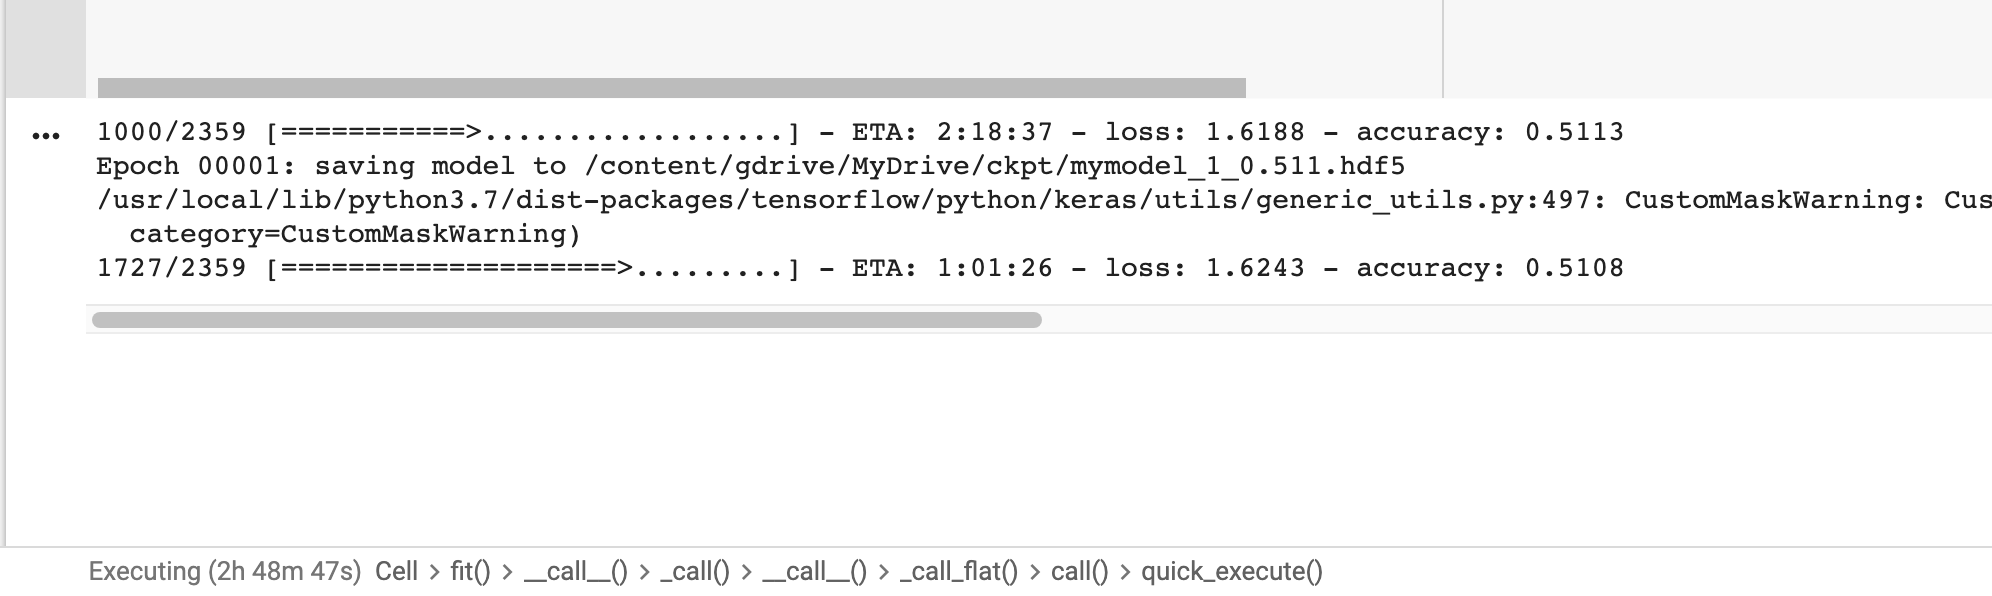

# Building on the Topic Layer

##Adding softmax of 1000 units and freezing the layers for this base model.

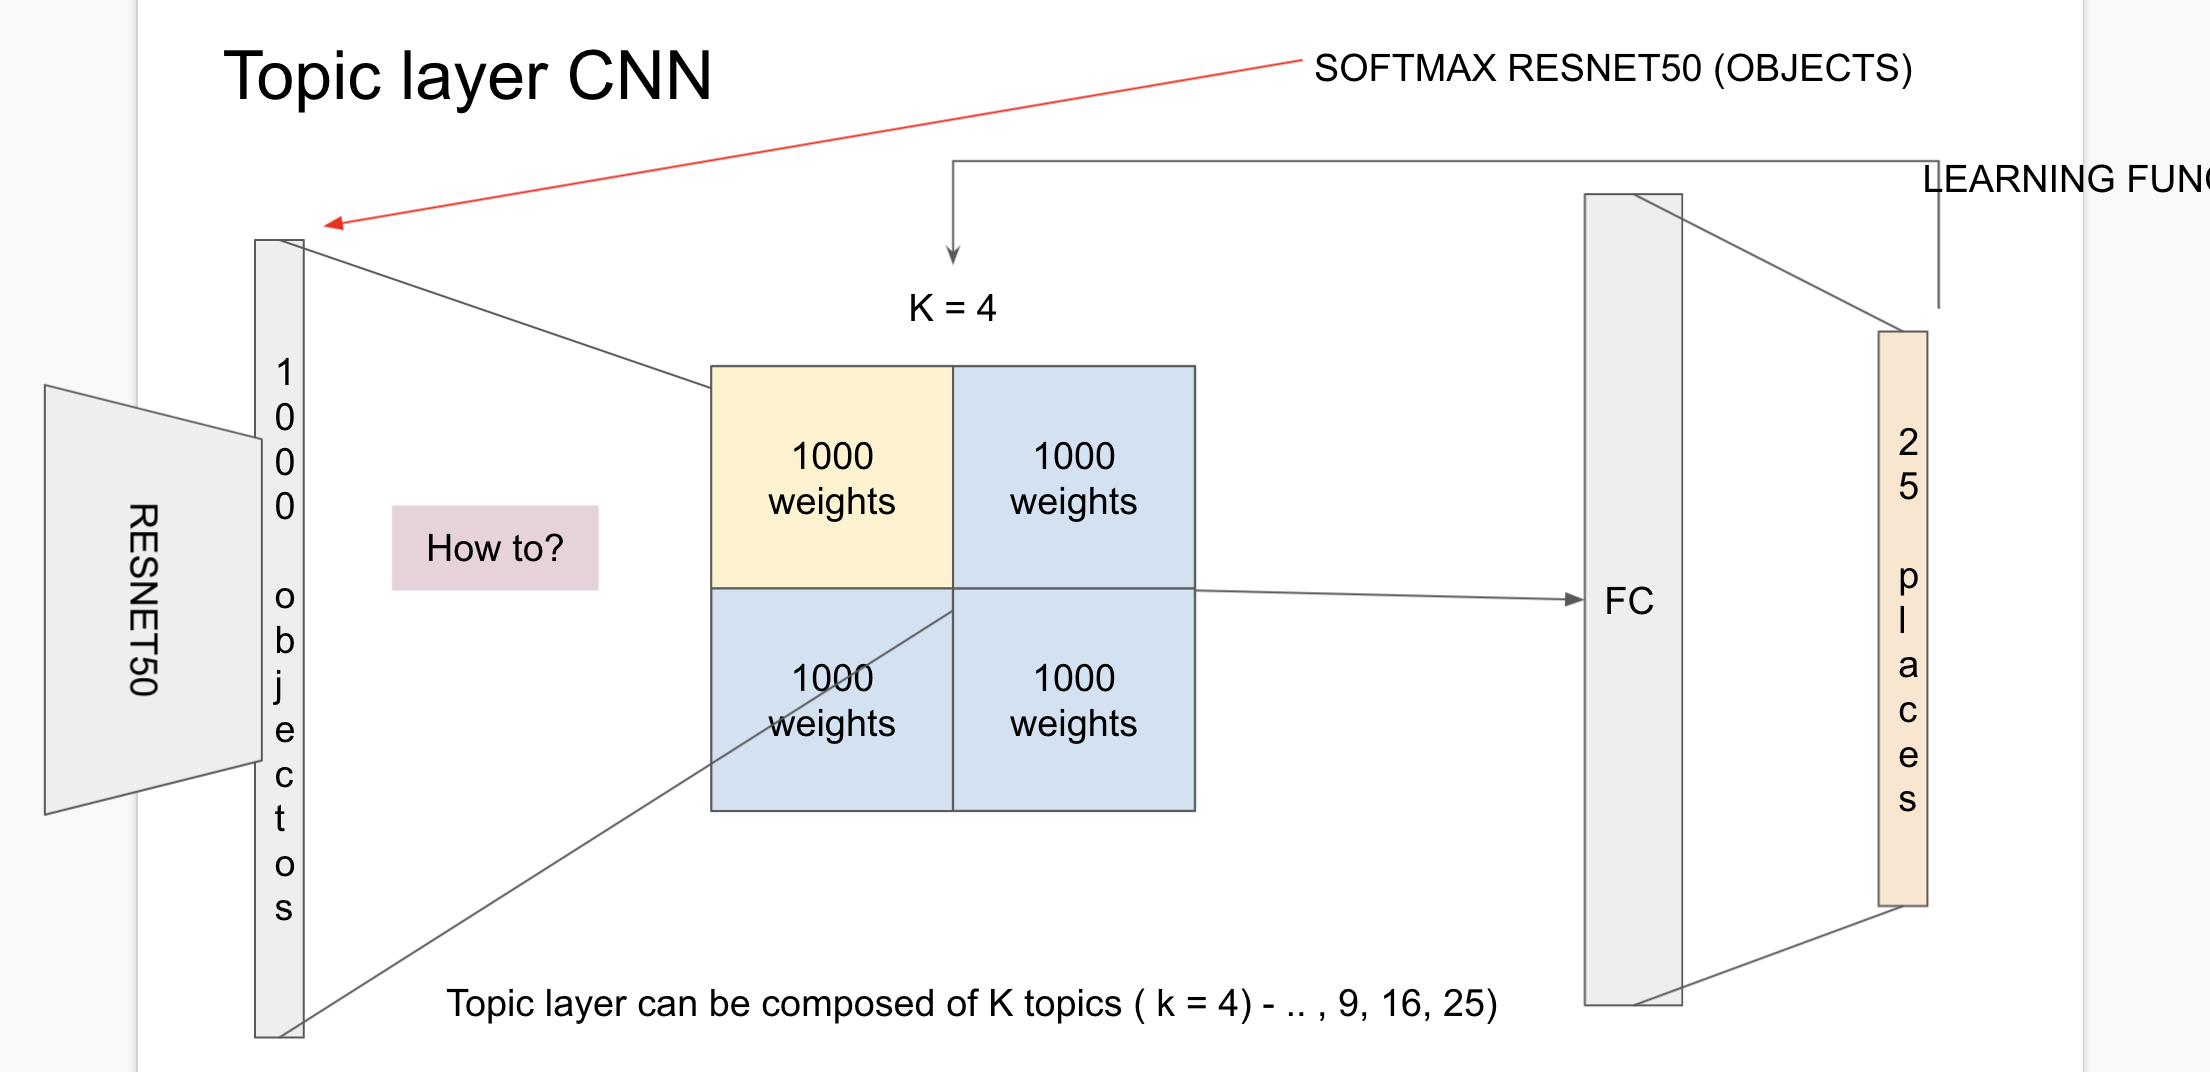

This will be used as input for the mail topic layer model



In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = AveragePooling2D(pool_size=(7,7))(x)
x = Flatten(name ="flatten")(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.5)(x)
preds = Dense(1000,activation="softmax")(x)


In [ ]:
model = Model(inputs = base_model.input,outputs = preds)

for layer in model.layers:
      layer.trainable = False


In [ ]:
model.summary()
#All parameters set to non trainable

###Decentralized approach
* For each topic layer : 
  *   Dense layer of 1000 neurons(number of objects) with tanh activation
  *   50% Dropout layer
  *   Dense layer of 1024 units(tanh activation)
  *   50% Drop out layer
  *   Soft-max layer containing the 24 classes required
* The output of the softmax is returned individually for each topic

**The decoding and predictions might work better than the centralized model but adds the number of parameters significantly**



In [ ]:
# model.summary()
y = Dense(1000,activation='tanh',)(model.output)

k_1 = Dense(1000)(y)
k_1 = Dropout(0.5)(k_1)
k_1 = Dense(1024,activation='tanh')(k_1)
k_1 = Dropout(0.5)(k_1)
k_1 = Dense(24,activation='softmax')(k_1)

k_2 = Dense(1000)(y)
k_2 = Dropout(0.5)(k_2)
k_2 = Dense(1024,activation='tanh')(k_2)
k_2 = Dropout(0.5)(k_2)
k_2 = Dense(24,activation='softmax')(k_2)

k_3 = Dense(1000)(y)
k_3 = Dropout(0.5)(k_3)
k_3 = Dense(1024,activation='tanh')(k_3)
k_3 = Dropout(0.5)(k_3)
k_3 = Dense(24,activation='softmax')(k_3)

k_4 = Dense(1000)(y)
k_4 = Dropout(0.5)(k_4)
k_4 = Dense(1024,activation='tanh')(k_4)
k_4 = Dropout(0.5)(k_4)
k_4 = Dense(24,activation='softmax')(k_4)

decen_model = Model(inputs = base_model.input,outputs = [k_1,k_2,k_3,k_4])

In [ ]:
decen_model.summary()

##Centralized approach (a)
###Creating n topic layers.

####a. Each individual layer contains...

1. Dense layer of 1000 neurons(number of objects) : Activation => tanh
2. 50% drop out layer
3. Dense layer of 1024 neurons : Activation => tanh
4. 50% Drop out layer  
5. Softmax layer for the number of classes

####b. Concatenating these layers 
1. The final layer contains 96 units with the following:
  *   k_1 = First 24 units
  *   k_2 = Second 24 units
  *   k_3 = Third 24 units
  *   k_4 = Final 24 units

**Issue: Could be hard to devise a learning function. Currently unable to visualize the output format and how it can be decoded in this format**

In [ ]:
y = Dense(1000,activation='tanh',)(model.output)

k_1 = Dense(1000)(y)
k_1 = Dropout(0.5)(k_1)
k_1 = Dense(1024,activation='tanh')(k_1)
k_1 = Dropout(0.5)(k_1)
k_1 = Dense(24,activation='softmax')(k_1)

k_2 = Dense(1000)(y)
k_2 = Dropout(0.5)(k_2)
k_2 = Dense(1024,activation='tanh')(k_2)
k_2 = Dropout(0.5)(k_2)
k_2 = Dense(24,activation='softmax')(k_2)

k_3 = Dense(1000)(y)
k_3 = Dropout(0.5)(k_3)
k_3 = Dense(1024,activation='tanh')(k_3)
k_3 = Dropout(0.5)(k_3)
k_3 = Dense(24,activation='softmax')(k_3)

k_4 = Dense(1000)(y)
k_4 = Dropout(0.5)(k_4)
k_4 = Dense(1024,activation='tanh')(k_4)
k_4 = Dropout(0.5)(k_4)
k_4 = Dense(24,activation='softmax')(k_4)

conc = Concatenate(name = "Conc_2")([k_1,k_2,k_3,k_4])

cent_model = Model(inputs = base_model.input,outputs = conc)

In [ ]:
cent_model.summary()

##Centralized approach (b)
###Creating n topic layers.

####a. Each individual layer contains...

1. Dense layer of 1000 neurons(number of objects) : Activation => tanh
2. 50% drop out layer
3. Dense layer of 1024 neurons : Activation => tanh
4. 50% Drop out layer  
5. Softmax layer for the number of classes

####b. Concatenating these layers 
1. The final layer contains 96 units with the following:
  *   k_1 = First 24 units
  *   k_2 = Second 24 units
  *   k_3 = Third 24 units
  *   k_4 = Final 24 units
2. These concatenated layer are flattened in order to give with 96(24*4) neurons(24 classes for each topic when k=4).

**Issue : Could be hard to map the softmax outputs individually to the corresponding topic with this approach**


In [ ]:
y = Dense(1000,activation='tanh')(model.output)

k_1 = Dense(1000)(y)
k_1 = Dropout(0.5)(k_1)
k_1 = Dense(1024,activation='tanh')(k_1)
k_1 = Dropout(0.5)(k_1)
k_1 = Dense(24,activation='softmax')(k_1)

k_2 = Dense(1000)(y)
k_2 = Dropout(0.5)(k_2)
k_2 = Dense(1024,activation='tanh')(k_2)
k_2 = Dropout(0.5)(k_2)
k_2 = Dense(24,activation='softmax')(k_2)

k_3 = Dense(1000)(y)
k_3 = Dropout(0.5)(k_3)
k_3 = Dense(1024,activation='tanh')(k_3)
k_3 = Dropout(0.5)(k_3)
k_3 = Dense(24,activation='softmax')(k_3)

k_4 = Dense(1000)(y)
k_4 = Dropout(0.5)(k_4)
k_4 = Dense(1024,activation='tanh')(k_4)
k_4 = Dropout(0.5)(k_4)
k_4 = Dense(24,activation='softmax')(k_4)

flat = Concatenate(name = "Conc")([k_1,k_2,k_3,k_4])
flat = Flatten(name = "flat_2")(flat)

cent_model_b = Model(inputs = base_model.input,outputs = flat)

In [ ]:
cent_model_b.summary()

##Centralized approach (c) {Looks closest to the schematic on the slides}

* Taking the output of the resnet soft max into k_1,k_2,k_3 and k_4 
* Concatenating the layers in order to get 4000 neurons with the 1000 objects for each topic(k=4)
* Flattening the different topics into Dense layer of 4000 neurons(4 topics*1000 objects)
* Adding a dense layer of 4000 neurons with tanh activation
* Adding 50% Dropout rate
* Using softmax in order to get the places(p = 24 i.e num_classes)

**Issue : Does not give places probabilities for each topic individually as it is being flattened and fed to softmax with only 24 units for each class**

In [ ]:
#Using the output from the resnet model in order to create topics
#Defining the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = AveragePooling2D(pool_size=(7,7))(x)
x = Flatten(name ="flatten")(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.5)(x)
preds = Dense(1000,activation="softmax")(x)

#Activating the model

model = Model(inputs = base_model.input,outputs = preds)

#predictions = Dense(26,activation='softmax')(x)
#Using softmax for base classification
#model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
for layer in model.layers:
    layer.trainable = False
# y = Dense(1)(model.output)
k_1 = Dense(20,name = 'topic_1')(model.output)
k_2 = Dense(20,name = 'topic_2')(model.output)
k_3 = Dense(20,name = 'topic_3')(model.output)
k_4 = Dense(20,name = 'topic_4')(model.output)
wt_add = Wt_Topics(1)
sum_layer = wt_add(k_1,k_2,k_3,k_4)
flat_2 = Flatten(name = 'flat_c')(sum_layer)
# w_1 = tf.Variable(1.0,name='weight_topic_1',trainable=True )
# w_2 = tf.Variable(1.0 ,name='weight_topic_2',trainable=True)
# w_3 = tf.Variable(1.0 ,name='weight_topic_3',trainable=True )
# w_4 = tf.Variable(1.0 ,name='weight_topic_4',trainable=True)
# conc2 = Concatenate(name = 'conc_c')([k_1,k_2,k_3,k_4])
# flat_2 = Flatten(name = 'flat_c')(conc2)
# #Adding the Dense layers now
# topic = Dense(4000,activation='tanh')(flat_2)
# topic = Dropout(0.5)(topic)
topic = Dense(128,activation='tanh')(flat_2)
topic = Dropout(0.2)(topic)
final = Dense(24,activation='softmax')(topic)


In [ ]:
# conc2 = Concatenate(name = 'conc_c')([k_1*w_1,k_2*w_2,k_3*w_3,k_4*w_4])

In [ ]:
cent_model_c = Model(inputs = base_model.input,outputs = final)

In [ ]:
cent_model_c.summary()

In [ ]:
opti = tf.keras.optimizers.Adadelta(learning_rate=1e-1, rho=0.95, epsilon=1e-07, name="Adadelta")
cent_model_c.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()],loss='categorical_crossentropy')

In [ ]:
class Wt_Topics(keras.layers.Layer):
  def __init__(self, units):
    super(Wt_Topics, self).__init__()
    self.units = units 
    # self.name = name      

  def build(self,input_shape):
    
    w_init = tf.random_normal_initializer()
    self.w1 = tf.Variable(
        initial_value=w_init(shape=(1, self.units), dtype="float32"),
        trainable=True,name = 'weight_topic_1'
    )
    self.w2 = tf.Variable(
        initial_value=w_init(shape=(1, self.units), dtype="float32"),
        trainable=True,name = 'weight_topic_2'
    )  
    self.w3 = tf.Variable(
        initial_value=w_init(shape=(1, self.units), dtype="float32"),
        trainable=True,name = 'weight_topic_3'
    )       
    self.w4 = tf.Variable(
        initial_value=w_init(shape=(1, self.units), dtype="float32"),
        trainable=True,name = 'weight_topic_4'
    )
  def call(self, input1, input2, input3,input4):
    #name = 'tops'
    return tf.multiply(input1,self.w1) + tf.multiply(input2, self.w2) + tf.multiply(input3, self.w3)+tf.multiply(input4, self.w4)

In [ ]:
top_1 = cent_model_c.get_layer( index=-5)
topic_layer_weights = top_1.get_weights()
topic_1 = cent_model_c.get_layer(name = 'topic_1')
topic_1_weights = topic_1.get_weights()
topic_1_weights[0].shape
topic_layer_weights
cent_model_c.layers[-5].get_weights()

# Making function for predicting the model

In [ ]:
#model = tf.keras.models.load_model('')
test_file = '/content/test.csv'
test_ds = pd.read_csv(test_file)
test_ds['Image'] = test_ds['Image'].str.replace('/data/s4133366/data','/content/gdrive/MyDrive/data')
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/gdrive/MyDrive/data/train',
  seed=123,
  image_size=(224, 224),
  batch_size=64,color_mode = 'rgb',shuffle = True,label_mode = 'categorical')

#Testing

In [ ]:
wt_add = Wt_Add(1,1)
sum_layer = wt_add(k_1,k_2,k_3,k_4)

In [ ]:
# new_model.summary()
#test_model = Model(inputs = model.input,outputs = k_1)
for layer in test_model.layers:
  weights = layer.get_weights()

In [ ]:
weights

In [ ]:
np.random.seed(7)
lr = 1e-2
num_epochs = 10
opti = Adam(learning_rate= lr,decay = lr/num_epochs)
model.compile(optimizer=opti,metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
test_model.predict(testGen)

testing stuff

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.

print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)

ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers), 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

In [ ]:
len(test_labels)

In [ ]:
test_labels = pd.read_csv('/content/train.csv')
test_labels.head(1)
class_names_meta = test_labels['Label'].unique()
class_names_meta
len(class_names_meta)

In [ ]:
Y = train['Label']
X = train['Path']

In [ ]:
sorted(class_names_meta)
for class_name in class_names_meta:
  class_name_rep = class_name.replace(" ","_")
  class_name_rep = class_name_rep.replace("/","_")
  class_name_rep = class_name_rep.replace(" ","")
  class_name_rep = class_name_rep.replace(",_","_")
  class_name_rep = class_name_rep.replace(",","_")
  #print(class_name_rep)
  h = "df_" + str(class_name_rep)
  vars()[h] = test_labels[test_labels['Label'] == class_name]
  print("Created: ",h,' ',len(vars()[h]))

In [ ]:
df_Office_updated = df_Office.sample(3000)
df_Transportation_updated = df_Transportation.sample(3000)
df_Education_science_updated = df_Education_science.sample(3000)
df_Pathways_updated = df_Pathways.sample(3000)
df_Restaurant_Bar_updated = df_Restaurant_Bar.sample(3000)


In [ ]:
df_list = [df_Bedroom,df_Office_updated,df_Other_rooms,df_Living_room,df_Noise,df_Bathroom,df_Pathways_updated,df_Shop,df_Buildings,df_Others,df_Sport_fields,df_Kitchen,df_Garden,df_Balcony,df_Beach,df_Recreation,df_Museum,df_Hospital,df_Water,df_Forest_field_jungle,df_Mountains_hills_desert_sky,df_Transportation_updated,df_Education_science_updated,df_Restaurant_Bar_updated]
train_df = pd.concat(df_list)
len(train_df)

In [ ]:
train_df.head

In [ ]:
train_df.head(1)

In [ ]:
num_epochs =20

In [ ]:
tr_df = train_df 
num_epochs = 10
tr_df['Image'] = tr_df['Image'].str.replace('/data/s4133366/data','/content/gdrive/MyDrive/data')
tr_df = shuffle(tr_df)

datagen = ImageDataGenerator(rescale=1./255)
train = datagen.flow_from_dataframe(tr_df,'/content/gdrive/MyDrive/data/train',x_col="Image",y_col="Label",target_size=(224,224),color_mode='rgb',batch_size=151,shuffle=True,class_mode='categorical',seed=42)
STEP_SIZE_TRAIN = train.n//train.batch_size

In [ ]:
save_dir = '/content/gdrive/MyDrive/saved_models'
callbacks = [
    ModelCheckpoint(
        
        filepath=os.path.join(save_dir,'test_base'),
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="categorical_accuracy",
        verbose=1,
        save_freq = 197,mode = 'max'
    ),
    EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )
    #, ReduceLROnPlateau(monitor='loss', factor=0.1,
    #                           patience=3, min_lr=1e-4,verbose=1)
    ]

In [ ]:
np.random.seed(7)
lr = 1e-1
num_epochs = 10
opti = Adam(learning_rate= lr)
model.compile(optimizer=opti,metrics=[tf.keras.metrics.Accuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],loss='categorical_crossentropy')

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/saved_models/base_short')
history = model.fit(train,epochs = num_epochs,steps_per_epoch=STEP_SIZE_TRAIN,callbacks = callbacks,verbose = 1,workers = 4,use_multiprocessing = False)

In [ ]:
save_d = '/content/gdrive/MyDrive/saved_models'
#model.save(os.path.join(save_d,'base_short_1'))

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/saved_models/base_short_3')
history = model.fit(train,epochs = num_epochs,steps_per_epoch=STEP_SIZE_TRAIN,callbacks = callbacks,verbose = 1,workers = 4,use_multiprocessing = False)
model.save(os.path.join(save_d,'base_short_3'))

In [ ]:
model.save(os.path.join(save_d,'base_short_3'))

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/saved_models/base_short_4')
history = model.fit(train,epochs = num_epochs,steps_per_epoch=STEP_SIZE_TRAIN,callbacks = callbacks,verbose = 1,workers = 4,use_multiprocessing = False,shuffle = True)
model.save(os.path.join(save_d,'base_short_5'))

In [ ]:
reduced_mod_1 = history.history

In [ ]:
reduced_mod_1

In [ ]:
np.save('/content/gdrive/MyDrive/history/history_2.npy', reduced_mod_1) 

In [ ]:
read_dictionary = np.load('/content/gdrive/MyDrive/history/history_1.npy',allow_pickle='TRUE').item()

In [ ]:
read_dictionary

In [ ]:

train = shuffle(train)

# Testing out k fold with tensors

In [ ]:
train_meta = pd.read_csv('/content/gdrive/MyDrive/train_names.csv')
val_meta = pd.read_csv('/content/gdrive/MyDrive/val_names.csv')
test_meta = pd.read_csv('/content/gdrive/MyDrive/test_names.csv')

In [ ]:
train_meta.columns = ['ID','Path']
train_met = train_meta.Path
val_meta.columns = ['ID','Path']
val_met = val_meta.Path

In [ ]:
train_met = pd.DataFrame(train_met)
val_met = pd.DataFrame(val_met)


In [ ]:
tv = [train_met,val_met]
tnv = pd.concat(tv)

In [ ]:
tnv

In [ ]:
tnv = tnv.sample(frac=1,random_state = 42)

In [ ]:
tnv

In [ ]:
#Function to get labels
def kfold_label_maker(meta):

  meta['PicName'] = meta['Path'].apply(lambda x: x.split('/')[-1])
  meta['Label'] = meta['Path'].apply(lambda x: x.split('/')[-2])
  #meta['Image'] = meta['Image'].str.replace('/content/gdrive/MyDrive','/data/s4133366')
  kfold = meta[['Path','Label']]
  return kfold

In [ ]:
train = kfold_label_maker(tnv)

In [ ]:
Y = train['Label']
X = train['Path']

In [ ]:
def get_label(file_path):
  # convert the path to a list of path components separated by sep
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.cast(one_hot, tf.int32)

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)  
  # resize the image to the desired size
  return tf.image.resize(img, [224, 224])

def process_TL(file_path):
  label = get_label(file_path) 
  img = tf.io.read_file(file_path) 
  img = decode_img(img)
  img = preprocess_input(img)
  img = tf.cast(img/255. ,tf.float32)
  return img, label


In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+

In [ ]:
class_names = np.array(sorted([dir1 for dir1 in os.listdir('/content/gdrive/MyDrive/data/test')]))
len(class_names)

In [ ]:

num_folds = 4
batch_size = 64
skfold = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=42)
fold_no = 1
history_path = '/content/gdrive/MyDrive/history'
print('LOADING THE DATA ON TO TENSORS......')
save_dir = '/content/gdrive/MyDrive/saved_models'

for train_index, val_index in skfold.split(X,Y):
  training_data = train.iloc[train_index]
  valid_data = train.iloc[val_index]
  print(len(training_data))
  print(len(valid_data))
  train_data = training_data['Path']
  train_labels = training_data['Label']
  val_labels = valid_data['Label']
  val_data = valid_data['Path']
  train_tensor = tf.data.Dataset.from_tensors(train_data)
  val_tensor = tf.data.Dataset.from_tensors(val_data)
  train_tensor.shuffle(len(train_data))
  val_tensor.shuffle(len(val_data))
  print(train_tensor)
  tra_tens = train_tensor.unbatch().map(process_TL)
  val_tens = val_tensor.unbatch().map(process_TL)
  print(tra_tens,' ',tf.data.experimental.cardinality(tra_tens))
  train_cache = tra_tens.cache()
  val_cache = val_tens.cache()
  #normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
  val_batch = val_tens.batch(batch_size)
  train_batch= tra_tens.batch(batch_size)
  train_ds = train_batch.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  val_ds = val_batch.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  print(train_ds)
  

  # class_weights = class_weight.compute_class_weight(
  #          'balanced',
  #           np.unique(ktrainGen.classes), 
  #           ktrainGen.classes)

  # train_class_weights = dict(enumerate(class_weights))

    #Create model
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  x = base_model.output
  x = AveragePooling2D(pool_size=(7,7))(x)
  x = Flatten(name ="flatten")(x)
  x = Dense(128,activation="relu")(x)
  x = Dropout(0.5)(x)
  preds = Dense(24,activation="softmax")(x)

  # #Activating the model

  model = Model(inputs = base_model.input,outputs = preds)


  for layer in base_model.layers:
      layer.trainable = False

  lr = 1e-2
  num_epochs = 1
  opti = tf.keras.optimizers.Adadelta(learning_rate=lr, rho=0.95, epsilon=1e-07, name="Adadelta")
  model.compile(optimizer=opti,metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()],loss='categorical_crossentropy')

  callbacks = [
    ModelCheckpoint(
        
        filepath=os.path.join(save_dir,'base_m'+str(fold_no)),
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="accuracy",
        verbose=1,
        save_freq = 442,mode = 'max'
    ),
    EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    ),
    ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=3, min_lr=1e-5,verbose=1)
    ]

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(train_ds,epochs=1,callbacks=callbacks,verbose=1,workers=8,use_multiprocessing = False,shuffle=True)
  model.save('/content/gdrive/MyDrive/saved_models/train_tf_kfold_'+str(fold_no))
  report = history.history
  np.save(os.path.join(history_path,'history'+str(fold_no)+'.npy'), report)
  print('Results saved to disk ...')
  print('Evaluating the model ...') 
  model = keras.models.load_model("/content/gdrive/MyDrive/saved_models/train_tf_kfold_"+str(fold_no))
  results = model.evaluate(val_ds,workers = 4)
  results = dict(zip(model.metrics_names,results))
  np.save(os.path.join(history_path,'results_'+str(fold_no)+'.npy'), results)
  



  # tf.keras.backend.clear_session()

  fold_no += 1

  print('Going to next fold................')



In [ ]:
train_cache

In [ ]:
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_labels), 
            train_labels)

  #train_class_weights = dict(enumerate(class_weights))

In [ ]:
train_class_weights = dict(enumerate(class_weights))

In [ ]:
history_path = '/content/gdrive/MyDrive/history'
np.save(os.path.join(history_path,'dummy_'+str(fold_no)+'.npy'), train_class_weights) 

In [ ]:
train_ds

# Training Places 365 object

In [ ]:
import urllib.request
import tarfile
thetarfile = 'http://data.csail.mit.edu/places/places365/places365standard_easyformat.tar'
ftpstream = urllib.request.urlopen(thetarfile)
print(ftpstream)
#thetarfile = tarfile.open(fileobj=ftpstream, mode="r")
#thetarfile.extractall(places_365_path)

In [ ]:
import tarfile
  
# open file
file = tarfile.open('http://data.csail.mit.edu/places/places365/places365standard_easyformat.tar')
  
# extracting file
file.extractall('./Destination_FolderName')
  
file.close()

##Plot metrics declaration here ...

In [ ]:
plot_dir = '/content/gdrive/MyDrive/plots'
#For peregrine
#plot_dir = '/data/s4133366/saved_models/history/plots'
def plot_metrics(history_path,results_path,model_name):
  read_train = np.load(history_path,allow_pickle=True).item()
  read_test = np.load(results_path,allow_pickle=True).item()
  history_path = os.path.split(history_path)[-1]
  get_fold = history_path[-5]
  history_path = history_path.replace('.npy','')
  if not os.path.isdir(plot_dir):
    print('Plot directory '+plot_dir+' does not exist at the moment. Creating ....')
    os.mkdir(plot_dir)
    print(plot_dir+' created ...')
  if not os.path.isdir(os.path.join(plot_dir,history_path)) :
    os.mkdir(os.path.join(plot_dir,history_path))
    folder_path = os.path.join(plot_dir,history_path)
    print(folder_path+' created...')
  else:
    folder_path = os.path.join(plot_dir,history_path)
    print(folder_path,' exists ...')  
  print('Adding the metric plots to ',folder_path)
  
  #summarize history for accuracy
  
  plt.plot(read_train['categorical_accuracy'])
  plt.axhline(read_test['categorical_accuracy'], color='g', linestyle='--')
  plt.plot(read_test['categorical_accuracy'])
  plt.title('model accuracy for '+model_name)
  plt.ylabel('Categorical Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(os.path.join(folder_path,'accuracy_'+str(history_path)+'.png'))
  plt.clf()
  print('Accuracy plot created ...')
  
  # summarize history for loss
  
  plt.plot(read_train['loss'])
  plt.axhline(read_test['loss'], color='g', linestyle='--')
  plt.title('model loss for '+model_name)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  #plt.show()
  plt.savefig(os.path.join(folder_path,'loss_'+str(history_path)+'.png'))
  plt.clf()
  print('Loss plot created ...')
  #summarize history for Precision 
  plt.plot(read_train['precision'])
  plt.axhline(read_test['precision'], color='g', linestyle='--')
  plt.title('model precision for '+str(model_name))
  plt.ylabel('Precision')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(os.path.join(folder_path,'precision_'+str(history_path)+'.png'))
  plt.clf()
  print('Precision plot created ...')
  #summarize history for Recall 
  
  plt.plot(read_train['recall'])
  plt.axhline(read_test['recall'], color='g', linestyle='--')
  plt.title('Model Recall for '+str(model_name))
  plt.ylabel('Recall')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(os.path.join(folder_path,'recall_'+str(history_path)+'.png'))
  plt.clf()
  print('Recall plot created ...')
  plt.plot(read_train['lr'])
  plt.title('Model Learning rate for :'+str(model_name))
  plt.ylabel('Recall')
  plt.xlabel('Epoch')
  plt.legend(['train'], loc='upper left')
  plt.savefig(os.path.join(folder_path,'lr_'+str(history_path)+'.png'))
  plt.clf()
  print('Learning rate plot created ...')

In [ ]:
model_name = 'baseline'
model_name_fds = 'baseline full fds'
his = np.load('/content/history_baseline.npy',allow_pickle=True).item()
print(his)
res = np.load('/content/results_baseline.npy',allow_pickle = True)
print(res)

his_fds = np.load('/content/history_baseline_full_ds.npy',allow_pickle=True).item()
print(his_fds)
res_fds = np.load('/content/results_baseline_full_ds.npy',allow_pickle = True)
print(res_fds)


In [ ]:
model_name = 'baseline'
model_name_fds = 'topic 1000 full fds'
his_name = '/content/history_baseline.npy'
res_name = '/content/results_baseline.npy'
his_fds = '/content/history_topic_1000_full_ds.npy'
res_fds = '/content/results_topic_1000_full_ds.npy'


In [ ]:
np.load(res_fds,allow_pickle=True)

In [ ]:
#plot_metrics(his_name,res_name,model_name)
plot_metrics(his_fds,res_fds,model_name_fds)

In [ ]:
shutil.rmtree('/content/gdrive/MyDrive/plots/history_baseline')

In [ ]:
#Download the metric files
!zip -r /content/history_baseline_full_ds.zip /content/gdrive/MyDrive/plots/history_baseline_full_ds

In [ ]:
item_list = ['/content/history_baseline_full_ds.zip','/content/history_baseline.zip']
for item in item_list:
  files.download(item)

#Places 365

In [ ]:
!wget 'http://data.csail.mit.edu/places/places365/places365standard_easyformat.tar'

In [ ]:
import tarfile
my_tar = tarfile.open('/content/places365standard_easyformat.tar')
my_tar.extractall('/content/gdrive/MyDrive/Places365') # specify which folder to extract to
my_tar.close()

In [ ]:
import os
arch = 'resnet50'
model_file = '%s_places365.pth.tar' % arch
if not os.access(model_file, os.W_OK):
    weight_url = 'http://places2.csail.mit.edu/models_places365/' + model_file
    test = os.system('wget ' + weight_url)


In [ ]:
weight_url

In [ ]:
import torch
model_dict=torch.load("/content/resnet18_places365.pth.tar")
type(model)

In [ ]:
model_dict

In [ ]:
from collections import OrderedDict
new_state_dict = OrderedDict()

In [ ]:
import torchvision.models as models

from collections import OrderedDict


cudnn.benchmark = True
model_dict=
#resnet18.load_state_dict(checkpoint['state_dict'])

pretrained_dict = model.state_dict()
#model_dict = model.state_dict()
# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict)
# 3. load the new state dict
resnet18.load_state_dict(model_dict)

#resnet18.load_state_dict(model['state_dict'],strict=False)

In [ ]:
Checkpoint = torch.load("/content/resnet18_places365.pth.tar") 
import torchvision.models as models
model = models.resnet18()
 #modelpath is the address of the model file you want to load.
# model.load_state_dict(Checkpoint['state_dict'])
# output = model(x)
state_dict =Checkpoint['state_dict']
from collections import OrderedDict
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    if 'module' not in k:
        k = 'module.'+k
    else:
        k = k.replace('features.module.', 'module.features.')
    new_state_dict[k]=v

model.load_state_dict(new_state_dict)

In [ ]:
torch.save({
    'state_dict': model.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, '/content/resnet18_places365.pth.tar')

# to load
checkpoint = torch.load('/content/resnet18_places365.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
train_path_places = '/content/gdrive/MyDrive/Places365/places365_standard/train'
test = os.listdir(train_path_places)

In [ ]:
test

In [ ]:
#/content/gdrive/MyDrive/Places365/places365_standard/train/airfield

train_folders = []
for folder in test:
  train_folders.append(os.path.join(train_path_places,folder))
print(train_folders)
#for t_files in train_folders:
  #create_df = 'df_'+t_files
 # print(t_files) 
   

In [ ]:
folder_dir = '/content/gdrive/MyDrive/Places365/places365_standard/train/museum-indoor'
list_files = os.listdir(folder_dir)
file_names = map(lambda x:os.path.join('/content/gdrive/MyDrive/Places365/places365_standard/train/museum-indoor',x),list_files)

In [ ]:
def get_df(folder_dir):
  train_dir = '/content/gdrive/MyDrive/Places365/places365_standard/train/'
  folder_name = os.path.join(train_dir,folder_dir)
  print('Folder name: ',folder_name)
  list_files = os.listdir(folder_name)
  print(str(len(list_files))+'files found in ',folder_name)
  file_names = map(lambda x:os.path.join(folder_name,x),list_files)
  list_file_names = list(file_names)
  df_name = 'df_'+folder_dir
  df_name = df_name.replace('-','_')
  vars()[df_name] = pd.DataFrame({'Image':list_file_names})
  #print(vars()[df_name]+' created ...')
  print(df_name)
  return vars()[df_name]


In [ ]:
for folders in os.listdir(train_path_places):
  get_df(folders)



In [ ]:
os.listdir(train_path_places)

##Subsampling Places 365

In [ ]:
df_list = []
for folders in os.listdir(train_path_places):
  
  train_dir = '/content/gdrive/MyDrive/Places365/places365_standard/train/'
  folder_name = os.path.join(train_dir,folders)
  print('Folder name: ',folder_name)
  list_files = os.listdir(folder_name)
  print(str(len(list_files))+'files found in ',folder_name)
  file_names = map(lambda x:os.path.join(folder_name,x),list_files)
  list_file_names = list(file_names)
  df_name = 'df_'+folders
  df_name = df_name.replace('-','_')
  vars()[df_name] = pd.DataFrame({'Image':list_file_names})
  #print(vars()[df_name]+' created ...')
  df_list.append(df_name)
  print(df_name)


In [ ]:
[lambda x:get_df(x) for x in folders)]


In [ ]:
get_df('museum-indoor')

In [ ]:
list_file_names = list(file_names)
#get_df(list_file_names)
print(list_file_names)
df_name = os.path.split(folder_dir)[-1]
df_name = df_name.replace('-','_')
df_string = 'df_'+df_name
vars()[df_string] = pd.DataFrame({'Image':list_file_names})
#test =list_file_names
print(vars()[df_string]+' created ...')
#pd.DataFrame({'Image':test})

In [ ]:
def df_add_label(df):
  #print(df['Image'][1])
  element = str(df['Image'].head(1))
  print(element)
  label = element.split('/')[-2]
  print('Label : ',label)
  df['Label'] = label


In [ ]:
df_bazaar_outdoor_test = df_bazaar_outdoor
df_add_label(df_bazaar_outdoor_test)

In [ ]:
df_bazaar_outdoor_test.head()

In [ ]:
for x in df_list:
  df_add_label(x) 
#df_add_label(df_airplane_cabin_test)


### Editing the places 365 csv files


In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/train_places365_sampled.csv')
#val = pd.read_csv('/content/val_places365_sampled.csv')


In [ ]:
class_names_meta = np.unique(final['Label'])
class_names_meta


In [ ]:
places_365_dict = {}
places_365_dict = dict(list(enumerate(class_names_meta)))

In [ ]:
places_365_dict

##DF Sampler Dec

In [ ]:
def df_sampler(df,amount):
  df = pd.read_csv(df_file)
  class_names_meta = np.unique(df['Label'])
  sorted(class_names_meta)
  df_list_names = []
  df_list = []
  for class_name in class_names_meta:
    class_name_rep = class_name.replace(" ","_")
    class_name_rep = class_name_rep.replace("/","_")
    class_name_rep = class_name_rep.replace(" ","")
    class_name_rep = class_name_rep.replace(",_","_")
    class_name_rep = class_name_rep.replace(",","_")
    #print(class_name_rep)
    h = "df_" + str(class_name_rep)
    vars()[h] = df[df['Label'] == class_name]
    vars()[h] = vars()[h].sample(amount)
    print("Created: ",h,' ',len(vars()[h]))
    df_list.append(vars()[h])
    df_list_names.append(h)
  final = pd.concat(df_list)
  return final

In [ ]:
final = pd.concat(df_list)


In [ ]:
final['Image'] = final['Image'].apply(lambda x:x.replace('places365_standard','places365_sampled'))

In [ ]:
from random import sample

In [ ]:
len(df_zen_garden)

In [ ]:
for name,dataframe in zip(df_list_names,df_list):
  dataframe = dataframe.sample(500)

In [ ]:
checkpoint = torch.load('filename.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
final.to_csv('short_p365.csv')

##Getting the disjoint of the two dataframes

In [ ]:
big_df = pd.read_csv('/content/train_places365_sampled.csv')
small_df = pd.read_csv('/content/short_p365.csv')

In [ ]:
len(big_df)-len(small_df)

In [ ]:
df = big_df[~big_df['Image'].isin(small_df['Image'])]

In [ ]:

big_df['Image'] = big_df['Image'].apply(lambda x:x.replace('/Volumes/Backup Plus/Places365_data','/data/s4133366'))
big_df['Image'] = big_df['Image'].apply(lambda x:x.replace('places365_standard','places365_sampled'))

In [ ]:
pd.read_csv('short_p365_test.csv')
#files.download('short_p365_test.csv')

In [ ]:
s1 = pd.merge(small_df, final, how='inner', on=['Image'])

#Making predictions on the baseline model for Places 365 Dataset

In [ ]:

########################
model_name = 'baseline_places365_latest_3'
model_string = 'Baseline Model for '
db_name = 'Places 365 '
predictions_csv_file = str(model_name)+'_predictions_tens.csv'
data_dir = '/content/drive/places365_sampled/train'
cr_name = 'Classification_Report_'+model_name+'_tens.csv'
cm_name = 'Confusion matrix_'+model_name+'_tens.png'
num_classes = 365
test_csv_file = 'short_p365_test.csv'
csv_dir = '/content/drive/places365_sampled'
save_dir = '/content/drive/MyDrive/saved_models'
model_dir = os.path.join(save_dir,model_name)
pred_dir = os.path.join(model_dir,'predictions')
cr_path = os.path.join(pred_dir,cr_name)
cm_path = os.path.join(pred_dir,cm_name)


batch_size = 125
#############################
#Try using the other workflow i.e from csv ...
print('Loading CSVs')

#For purging the cache ....

test_csv = pd.read_csv('/content/short_p365_test.csv')




In [ ]:
# test_csv = test_csv[['Image','Label']]
test_csv['Image'] = test_csv['Image'].apply(lambda x: x.replace('/content/drive/MyDrive','/content/drive/MyDrive/'))

In [ ]:
test_csv.head(1) #/content/drive/MyDrive/places365_sampled

In [ ]:
testing_data = test_csv

print(len(testing_data))



print('Data read and loading onto tensors.....')

def get_label(file_path):
# convert the path to a list of path components separated by sep
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.cast(one_hot, tf.int32)

def decode_img(img):
# convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)  
  # resize the image to the desired size
  return tf.image.resize(img, [224, 224])


def process_TL_Test(file_path):
  label = get_label(file_path) 
  img = tf.io.read_file(file_path) 
  img = decode_img(img)
  img = preprocess_input(img)
  img = tf.cast(img/255. ,tf.float32)
  return img
def process_TL_Labels(file_path):
  label = get_label(file_path) 
  img = tf.io.read_file(file_path) 
  img = decode_img(img)
  img = preprocess_input(img)
  img = tf.cast(img/255. ,tf.float32)
  return label
class_names = np.array(sorted([dir1 for dir1 in os.listdir('/content/drive/MyDrive/places365_sampled/train')]))



In [ ]:
label_dict = dict(list(enumerate(class_names)))
label_dict
test_labels = testing_data['Label']


In [ ]:
class_names = list(sorted([dir1 for dir1 in os.listdir('/content/drive/MyDrive/places365_sampled/train')]))

In [ ]:

y_true_test = pd.factorize(test_labels)[0]
len(test_labels),len(y_true_test)

In [ ]:
len(class_names)

In [ ]:



print('Converting labels to integers')

test_labels = testing_data['Label']
test_labels = test_labels.map(label_dict)
test_labels = test_labels.to_list()
labels = label_dict.keys()

print('Labels used in cm plotting: ',labels)

print('LOADING THE DATA ON TO TENSORS......')

test_data = testing_data['Image']

print('Cleaning prior cache ...')


print('test cache cleared ....')
testing_data = test_csv
print(len(testing_data))



print(len(test_data))




test_tensor = tf.data.Dataset.from_tensors(test_data)


test_tensor = test_tensor.unbatch()



test_tens = test_tensor.map(process_TL_Test)


print('test_tens:',tf.data.experimental.cardinality(test_tens))

test_cache = test_tens.cache()

#print(tf.data.experimental.cardinality(test_cache))

print('Created cache ...')

test_batch = test_cache.batch(batch_size)

test_ds = test_batch.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)




In [ ]:
test_ds

In [ ]:


############################
model = keras.models.load_model('/content/drive/MyDrive/saved_models/baseline_places365_latest_3_eval')
print('Model Loaded: '+os.path.join(model_dir,model_name)+' ...')
print("Predicting the model")

predictions = model.predict(test_ds,verbose=1,workers = 4,use_multiprocessing = False)
################################################


In [ ]:
predictions.shape

In [ ]:


#### CHANGE THIS WITH RESPECT TO THE TYPE OF DATA AUG USED #############
y_true = y_true_test
predictions_test = np.argmax(predictions,axis=1)
y_pred = predictions_test

#########################################################################################################
########################################################################################################



In [ ]:
len(predictions_test)

In [ ]:
class_report

In [ ]:

class_report = classification_report( y_true, y_pred,target_names=class_names,output_dict=True)
df_cr = pd.DataFrame(class_report).transpose()
df_cr.to_csv('class_report.csv')
print('Classification report saved to: '+cr_path)
print(classification_report(y_true, y_pred,target_names=class_names))



In [ ]:
import seaborn as sn
print('Plotting the confusion matrix ....')
cm = confusion_matrix(y_true,y_pred,labels =  list(range(0,num_classes)) )

df_cm = pd.DataFrame(cm,index = class_names  ,columns = class_names  )
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=False, annot_kws={"size": 15},cmap="BuPu") # font size
plt.title('Confusion matrix for '+model_string+' using '+db_name+'Dataset')
print('Saving plot in '+cm_path+' ...')
plt.savefig('confusion_matrix_baseline_p365',bbox_inches="tight")
print('Model predicted ....')

print('Clearning cache ...')
#purge(cache_dir,regu_te) 

print('Job ended ...')

In [ ]:
 weight_list = model.get_weights()
len(weight_list)

In [ ]:
weight_list

In [ ]:
outp=model.layers[-2].output

model1=keras.models.Model(model.input,outp)


In [ ]:
model1.save('/content/drive/MyDrive/saved_models/baseline_without_top')

In [ ]:
model1.layers[-2].get_weights()

In [ ]:
model.layers[-3].get_weights()

In [ ]:
for i in model1.layers:
  model1.set_weights(model.layers[i].get_weights)

In [ ]:
hidden_layer = model.layers[-2].output

In [ ]:
model1.summary()

In [ ]:
weight_list = []
for i in model.layers:
  weight_list.append(model.layers[i].get_weights())